#### 데이터 : 서울시 구별 cctv대수 + 서울시 구별 인구수(전체,한국인,외국인,65세이상 고령자)

##### 목적 : 데이터 분석

In [3]:
# 데이터 파일을 가져오기 위해 구글 드라이브 마운트(코랩에서)
# from google.colab import drive

# 한글 폰트 설치와 설정

import platform
from matplotlib import font_manager, rc

#플랫폼 패키지는 현재 내 컴퓨터의 os가 무엇인지 코드로 확인하는 패키지
#맥과 윈도우에서 다 사용할 수 있는 코드
#윈도우용 코드만 가져다 써도됨
if platform.system() == 'Darwin':   #macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':   #WINDOWS
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:   #LINUX
    print('Unknown system... sorry~~~~') 
    

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [ ]:
#코랩 한글

# 한글 폰트 설치와 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# from matplotlib import font_manager, rc
# from matplotlib import pyplot as plt
# # font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# # font = font_manager.FontProperties(fname=font_path).get_name()
# plt,rc('font', family = 'NanumBarunGothic' )

Text(0.5, 0, '한글테스트')

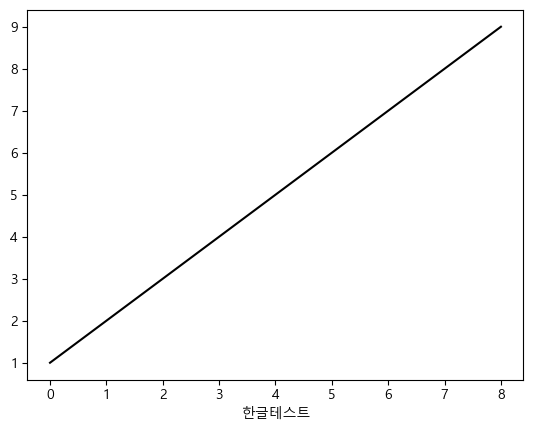

In [9]:
#한글이 잘 설치되었는지 확인해보자
import numpy as np

x = np.arange(1,10)

plt.plot(x,color='black')
plt.xlabel('한글테스트')

In [120]:
#csv 파일 가져오기

import pandas as pd
import numpy as np


#1. 파일 가져오기
csvPath = '01. CCTV_in_Seoul.csv'
# xlsxPath = 'C:\Users\user\DataAnalysis\data_practice\01. population_in_Seoul.xls'
cctv_seoul = pd.read_csv(csvPath)
# print(cctv_seoul)

#2. 데이터를 읽어온뒤
#info().describe().head(),tail() 찍어보자
cctv_seoul.info()
cctv_seoul.describe()
cctv_seoul.head()
cctv_seoul.tail()


#3. 데이터 정리하기
#필요한 데이터가 어떤것인지 생각해보기(ex-cctv증가율이 필요하다.)

cctv_seoul['증가율'] =  (cctv_seoul['2014년'] + cctv_seoul['2015년'] + cctv_seoul['2016년']) / cctv_seoul['2013년도 이전'] * 100
cctv_seoul['증가율'] = cctv_seoul['증가율'].round(1)



#4. 컬럼명 바꿔보기 
cctv_seoul.rename(columns={'기관명' : '구별',
                           '소계' : 'cctv소계',
                           '증가율' : 'cctv증가율'}, inplace= True)
cctv_seoul

# 데이터에 질문을 던지자!

#가장 많은 cctv를 가진 구는 어디? 적은 구는 어디?
#소계를 기준으로 가장 많은 구 5개, 적은 구 5개 

cctv_seoul.sort_values(by = 'cctv소계', ascending = False).head(10)

cctv_seoul.sort_values(by = 'cctv증가율', ascending= False, ignore_index=True).head()   #ignore_index -> True로 하면 인덱스를 다시 만들어준다. 기본값 False

# 컬럼 삭제해보기
cctv_seoul.drop(['2013년도 이전','2014년','2015년','2016년'],axis = 1)  #inplace하지 않았기때문에 저장은 안됨





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기관명        25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


,구별,cctv소계,cctv증가율
0,강남구,2780,150.6
1,강동구,773,166.5
2,강북구,748,125.2
3,강서구,884,134.8
4,관악구,1496,149.3
5,광진구,707,53.2
6,구로구,1561,65.0
7,금천구,1015,100.0
8,노원구,1265,188.9
9,도봉구,485,246.6


In [173]:
xlsxPath = '01. population_in_Seoul.xls'
pop_seoul = pd.read_excel(xlsxPath, header=2, usecols='B,D,G,J,N')
#헤더 지정하기, 사용할 컬럼 정하기, 결측치가 많은 행 삭제하기 

pop_seoul.tail()

#불필요한 행 삭제
pop_seoul.dropna(how='all', inplace=True)
pop_seoul.drop([0], inplace=True)

pop_seoul
#컬럼명 수정하기 
pop_seoul.columns = ['구별','총 인구수','한국인','외국인','고령자']
pop_seoul

pop_seoul.reset_index(drop=True)    #기존의 인덱스값은 삭제 
                                    #false하면 기존의 인덱스가 하나의 열로 추가된다.
# pop_seoul.concat(cctv_seoul)


#한국인,외국인,고령자 비율 구해보기 
# data_result = pop_seoul['한국인']/pop_seoul['총 인구수'] * 100
# data_result
# concat = pd.concat([pop_seoul,cctv_seoul])
# # concat = pd.concat([pop_seoul,cctv_seoul], ignore_index=True)
# concat


merged_data = pd.merge(pop_seoul,cctv_seoul, on='구별')   # how = 기본값은 inner
merged_data
merged_data.set_index('구별', inplace=True)
merged_data

,총 인구수,한국인,외국인,고령자,cctv소계,2013년도 이전,2014년,2015년,2016년,cctv증가율
구별,,,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,1002,464,314,211,630,248.9
중구,133240.0,124312.0,8928.0,20764.0,671,413,190,72,348,147.7
용산구,244203.0,229456.0,14747.0,36231.0,1624,1368,218,112,398,53.2
성동구,311244.0,303380.0,7864.0,39997.0,1062,730,91,241,265,81.8
광진구,372164.0,357211.0,14953.0,42214.0,707,573,78,53,174,53.2
동대문구,369496.0,354079.0,15417.0,54173.0,1294,1070,23,198,579,74.8
중랑구,414503.0,409882.0,4621.0,56774.0,660,509,121,177,109,80.0
성북구,461260.0,449773.0,11487.0,64692.0,1464,1009,78,360,204,63.6
강북구,330192.0,326686.0,3506.0,54813.0,748,369,120,138,204,125.2


In [ ]:
# 데이터에 질문을 던지자! 



<Axes: ylabel='구별'>

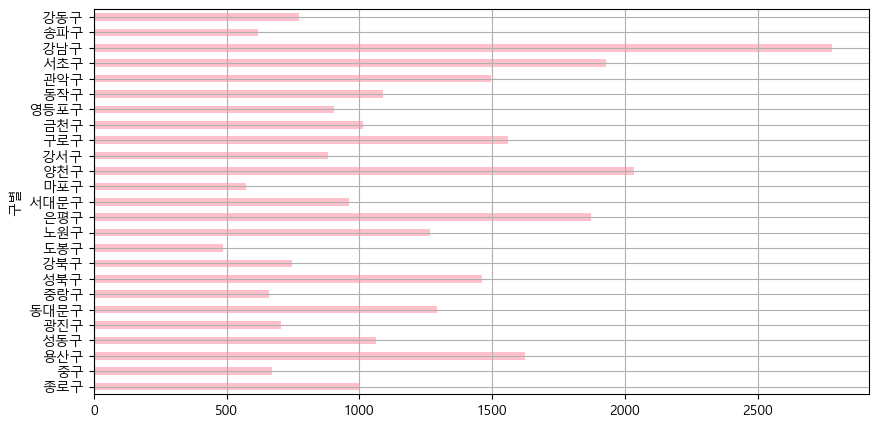

In [209]:
import matplotlib.pyplot as plt


#인덱스를 먼저 변경해준다.
plt.figure(figsize=(10,5))
merged_data['cctv소계'].plot(kind = 'barh', grid = True, color = 'pink')

Text(0.5, 1.0, '구별 cctv 현황')

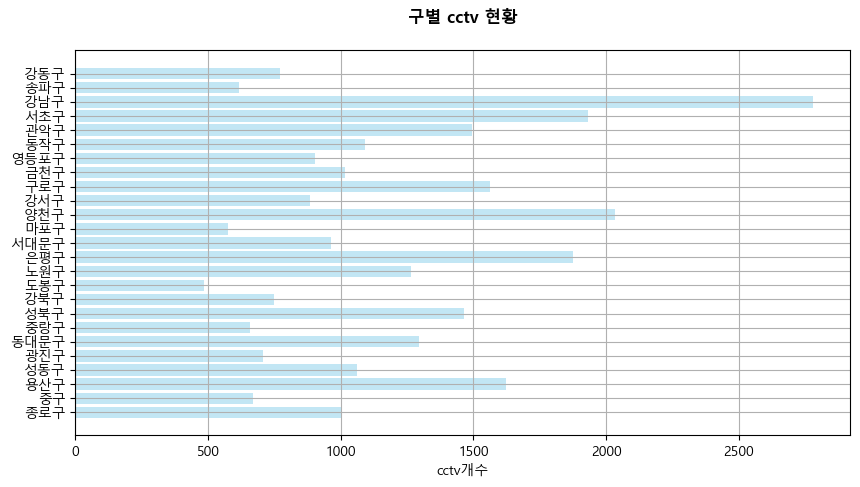

In [210]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

x = merged_data['cctv소계']
y = merged_data.index

plt.barh(y,x,color = 'skyblue', alpha = 0.5)

plt.grid(True)
plt.xlabel('cctv개수')
plt.title('구별 cctv 현황', pad = 20, fontweight = 'bold')

<Axes: ylabel='구별'>

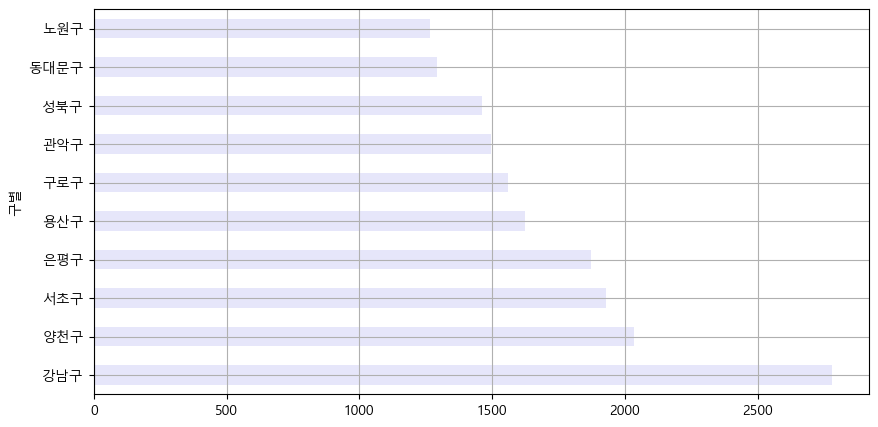

In [217]:
merged_data['cctv소계'].sort_values(ascending = False).head(10).plot(kind = 'barh', grid = True, color = 'lavender',figsize=(10,5)) #바닥으로부터 내림차순

Text(0.5, 1.0, 'cctv개수 top 5')

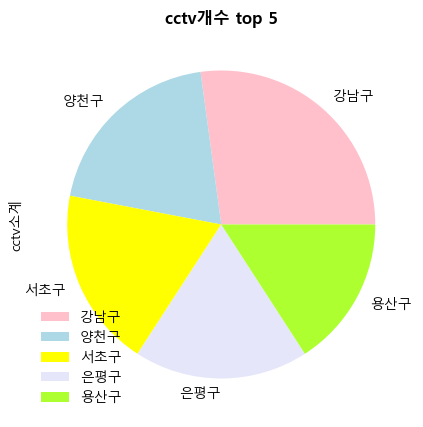

In [224]:

colors = ['pink','lightblue','yellow','lavender','greenyellow']
merged_data['cctv소계'].sort_values(ascending = False).head(5).plot(kind = 'pie', grid = True ,figsize=(10,5), colors = colors)
plt.legend(frameon=False)
plt.title('cctv개수 top 5', fontweight = 'bold')

C:\Users\user\AppData\Local\Temp\ipykernel_5648\3076024931.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x[i]*1.03, y[i], sorted.index[i], fontsize = 15, fontweight = 'bold')


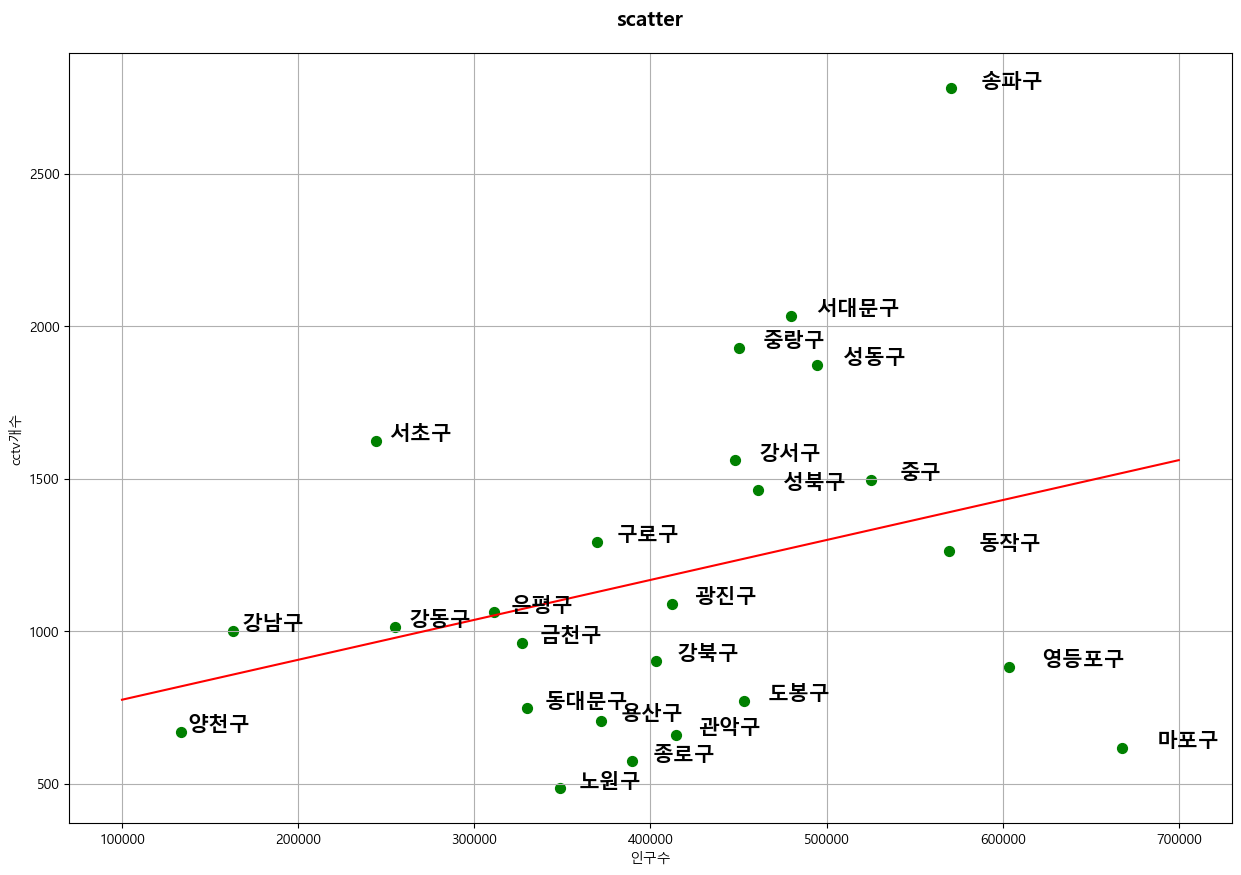

In [273]:
#직선의 방정식 
fp1 = np.polyfit(merged_data['총 인구수'], merged_data['cctv소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

x = merged_data['총 인구수']
y = merged_data['cctv소계']

plt.figure(figsize=(15,10))
plt.scatter(x,y, s = 50, color = 'green')
plt.plot(fx, f1(fx), color = 'red')

sorted = merged_data['cctv소계'].sort_values(ascending = False)
for i in range(25):
    plt.text(x[i]*1.03, y[i], sorted.index[i], fontsize = 15, fontweight = 'bold')

plt.xlabel('인구수')
plt.ylabel('cctv개수')
plt.title('scatter', fontweight = 'bold', fontsize = 15, pad= 20)
plt.grid()



In [226]:
crime_data = pd.read_csv('5대+범죄+발생현황_20240812131318.csv')
crime_data



,자치구별(1),자치구별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10,2022.11
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
2,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,소계,90399,65097,104,98,117,112,5816,5344,37579,20205,46783,39338
4,합계,종로구,3138,3284,2,3,8,8,228,988,1313,932,1587,1353
5,합계,중구,3071,2119,1,2,5,4,194,123,1365,724,1506,1266
6,합계,용산구,2967,2093,5,3,7,7,280,238,978,508,1697,1337
7,합계,성동구,2194,1597,2,2,2,2,125,97,979,538,1086,958
8,합계,광진구,3619,2498,6,5,-,-,230,174,1670,831,1713,1488
9,합계,동대문구,3253,2231,4,4,2,2,125,106,1556,823,1566,1296
